In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import trade
import random
import tester
import ge

%matplotlib inline
pd.set_option('display.notebook_repr', False)

In [2]:
# Atrificail data creation
# Sine wave

N = 2000
i = np.linspace(-np.pi, np.pi*8, N);
x = np.sin(i) + 2

df = pd.DataFrame(data=x,columns=['open'])
df['lag'] = df['open'].shift(1)
# When open increase, bar is up
df.ix[df['open'] > df['lag'], 'close'] = df['open'] + 0.1
df.ix[df['open'] > df['lag'], 'high']  = df['open'] + 0.15
df.ix[df['open'] > df['lag'], 'low']   = df['open'] - 0.05

# When open decrease, bar is down
df.ix[df['open'] < df['lag'], 'close'] = df['open'] - 0.1
df.ix[df['open'] < df['lag'], 'high']  = df['open'] + 0.05
df.ix[df['open'] < df['lag'], 'low']   = df['open'] - 0.15

# Else doji
df.ix[df['open'] == df['lag'], 'close'] = df['open']
df.ix[df['open'] == df['lag'], 'high']  = df['open'] + 0.05
df.ix[df['open'] == df['lag'], 'low']   = df['open'] - 0.05

df = df[1:]

In [3]:
data = {
    'open'  : df['open' ].values,
    'high'  : df['high' ].values,
    'low'   : df['low'  ].values,
    'close' : df['close'].values,
    'N' : N
}

In [4]:
system = ge.GE(data)

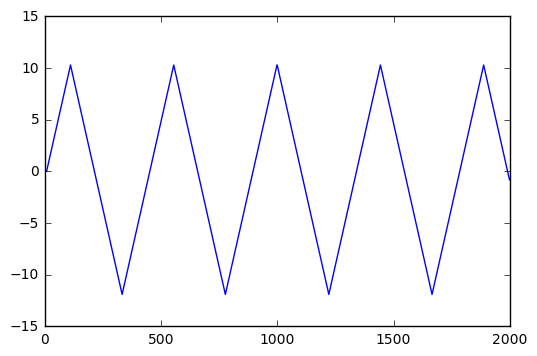

In [7]:
rna = [random.randint(0,256) for x in range(1,10000)]
r = system.calculate_fitness(rna)
plt.plot(np.cumsum(r['results']))
print(r['total'])